#### authors: Rafael Dousse, Eva Ray, Massimo Stefani

# PW4 - Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

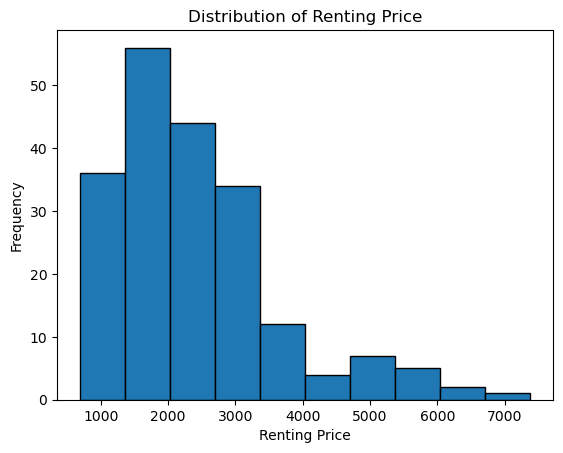

In [5]:
# Your code here
plt.hist(dataset['rent_price'], edgecolor='black')
plt.title('Distribution of Renting Price')
plt.xlabel('Renting Price')
plt.ylabel('Frequency')
plt.show()

b) Plot a histogram to visualize the distribution of the living area

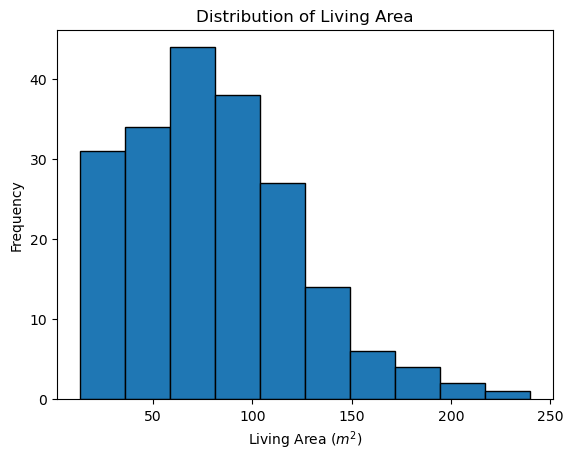

In [6]:
# Your code here
plt.hist(dataset['living_area'], edgecolor='black')
plt.title('Distribution of Living Area')
plt.xlabel('Living Area ($m^2$)')
plt.ylabel('Frequency')
plt.show()

c) Plot a scatter plot of renting price as a function of living area

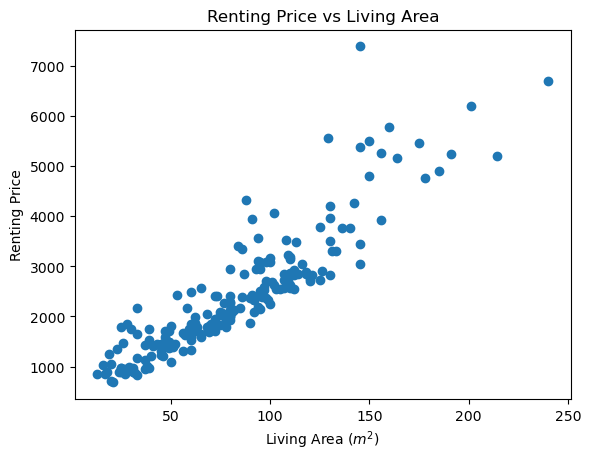

In [7]:
# Your code here
plt.scatter(dataset['living_area'], dataset['rent_price'])
plt.title('Renting Price vs Living Area')
plt.xlabel('Living Area ($m^2$)')
plt.ylabel('Renting Price')
plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

$$\theta = (X^{T}X)^{-1}X^{T}\vec{y} \tag{3}$$

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

In [8]:
# Your code here

b) Compute the overall cost value according to the following equation:

$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2} \tag{2}$$

In [9]:
# Your code here

## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

$$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) \tag{6}$$

$$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1} \tag{7}$$

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [ ]:
def batch_gradient_descent(initial_theta, alpha, cost_function, hypothesis_function, X, y, convergence_delta=1e-6, max_iterations=10000):
    # Convert the initial parameters to a NumPy array (ensures numeric type)
    theta = np.array(initial_theta, dtype=float)

    # Initialize the previous cost to infinity (so the loop starts)
    last_cost = float("inf")

    # Keep a history of all cost values to analyze convergence later
    cost_history = []

    # Repeats until convergence or reaching max_iterations 
    for _ in range(max_iterations):
        # Compute the current cost using the provided cost function
        current_cost = cost_function(hypothesis_function, theta, X, y)

        # Record the current cost for later inspection or plotting
        cost_history.append(current_cost)

        # Check if the improvement in cost is smaller than the convergence threshold
        # If yes, stop the loop (the algorithm has converged)
        if abs((last_cost - current_cost) / current_cost) < convergence_delta: break

        # Store current cost as the last cost for the next iteration comparison
        last_cost = current_cost

        # Compute the gradient (partial derivatives for each parameter theta_i)
        # Each element represents how much J(theta) changes with respect to theta_i
        gradient = np.array([cost_function(hypothesis_function, theta, X, y, gradient=True, index=i)
            for i in range(len(theta))
        ])

        # Update all theta values simultaneously using the gradient descent rule:
        # theta := theta - alpha * delta_J(theta)
        theta -= alpha * gradient

    return theta, cost_history


In [11]:
def hypothesis(theta, X):
    """Linear hypothesis function."""
    # This function represents the linear model: h_theta(x) = theta_0 + theta_1x
    # In vector form, this is written as: h_theta(X) = X · theta
    # X is a matrix where each row is a training example and columns are features (plus the bias term).
    # theta is the parameter vector [theta_0, theta_1].
    return X.dot(theta)  # Perform the dot product between X and theta to get predictions for all samples

In [ ]:
def cost(h, theta, X, y, gradient=False, index=None):
    """Mean squared error cost and gradient."""
    # Compute the Mean Squared Error (MSE) cost function and optionally its gradient.
    
    m = len(y)  # Number of training examples
    
    # Get model predictions for all samples using the hypothesis function h
    predictions = h(theta, X)
    
    # Compute the difference (error) between predicted and actual values
    errors = predictions - y
    
    # If 'gradient' is True, return the partial derivative of the cost w.r.t theta_i
    if gradient:
        # dJ/dtheta_i = (1/m) * sum((h_theta(x_n) - y_n) * x_n_i)
        # This tells us how much J(theta) changes if we slightly change theta_i
        return (1/m) * np.sum(errors * X[:, index])
    else:
        # Otherwise, return the scalar cost function J(theta)
        # J(theta) = (1/(2m)) * Σ[(h_theta(x_n) - y_n)^2]
        # The factor 1/2m simplifies the derivative when computing gradients
        return (1/(2*m)) * np.sum(errors ** 2)


In [13]:
X = np.c_[np.ones(len(dataset["living_area"])), dataset["living_area"].values]
y = dataset["rent_price"].values

initial_theta = np.zeros(2)
alpha = 1e-6

theta, costs = batch_gradient_descent(initial_theta, alpha, cost, hypothesis, X, y, max_iterations=500)
print("Optimized theta:", theta)
print("Final cost:", costs[-1])

Optimized theta: [ 0.29913098 28.22960658]
Final cost: 144935.79299619695


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

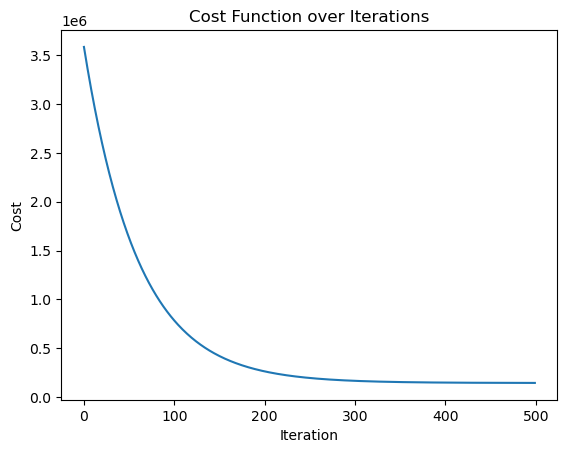

In [122]:
# Your code here
plt.plot(costs)
plt.title('Cost Function over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

_Your answer here_

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

The stopping criterion could be based on the change in the cost function value between iterations. If the change is below a certain threshold (e.g., 0.001) for a specified number of consecutive iterations, we can consider that the algorithm has converged and stop iterating. Alternatively, we could set a maximum number of iterations to prevent excessive computation time. In our implementation, we have set a maximum of 10000 iterations and a threshold of 1e-6 for the change in cost function value. The formula used is:
$$|J(\theta^{(k)}) - J(\theta^{(k-1)})| / J(\theta^{(k-1)}) < \text{threshold}$$

where $J(\theta^{(k)})$ is the cost function value at iteration $k$ and $J(\theta^{(k-1)})$ is the cost function value at the previous iteration.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

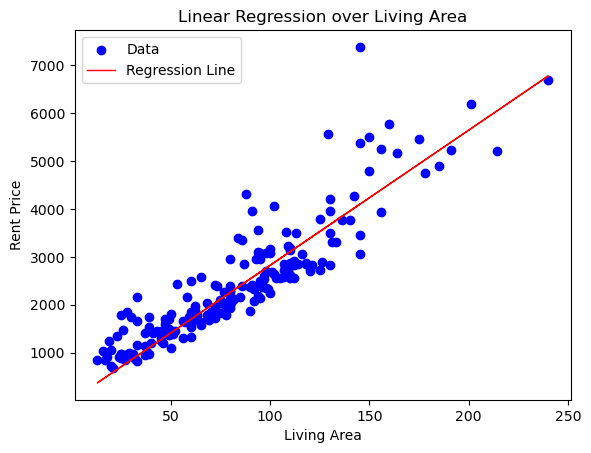

In [16]:
X = dataset["living_area"].values
y = dataset["rent_price"].values
plt.scatter(X, y, color='blue', label='Data')

# Compute predicted prices using the optimized theta
X_with_bias = np.c_[np.ones(len(X)), X]  # Add bias column
prices = X_with_bias @ theta

# Plot the computed line (regression line)
plt.plot(X, prices, color='red', linewidth=1, label='Regression Line')

plt.xlabel('Living Area')
plt.ylabel('Rent Price')
plt.title('Linear Regression over Living Area')
plt.legend()
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [18]:
# Your code here
# Use the existing cost function for consistency
final_cost_gd = cost(hypothesis, theta, X_with_bias, y)
print(f"Final Cost Value from Gradient Descent: {final_cost_gd:.6f}")

# For comparison, also compute using the manual formula (should be identical)
predicted_prices = hypothesis(theta, X_with_bias)
manual_cost = (1 / (2 * len(y))) * np.sum((predicted_prices - y) ** 2)
print(f"Manual calculation verification: {manual_cost:.6f}")

# Additional metrics for better analysis
mse = np.mean((predicted_prices - y) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Final Cost Value from Gradient Descent: 144922.851519
Manual calculation verification: 144922.851519
Mean Squared Error (MSE): 289845.703039
Root Mean Squared Error (RMSE): 538.37


_Your answer here_

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

$$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i} \tag{8}$$

In [14]:
# Your code here

a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

In [15]:
# Your code here

b) How many samples do you need to visit for reaching the convergence?

_Your answer here_

c) What kind of stopping criterion could we use here?

_Your answer here_

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [16]:
# Your code here

_Your answer here_

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

_Your answer here_

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

_Your answer here_

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

_Your answer here_

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

_Your answer here_

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_

## Exercise 6 - Optional – Mini-batch gradient descent for linear regression

In [24]:
def mini_batch_gradient_descent(initial_theta, alpha, cost_function, hypothesis_function, X, y, B, convergence_delta=1e-6, max_iterations=10000):
    # Convert the initial parameters to a NumPy array (ensures numeric type)
    theta = np.array(initial_theta, dtype=float)

    # Initialize the previous cost to infinity (so the loop starts)
    last_cost = float("inf")

    # Keep a history of all cost values to analyze convergence later
    cost_history = []

    # Get the total number of training examples
    N = len(y)

    # Repeats until convergence or reaching max_iterations 
    for _ in range(max_iterations):
        # Shuffle the data at the beginning of each epoch to avoid bias
        indices = np.arange(N)
        np.random.shuffle(indices)
        X_shuffled, y_shuffled = X[indices], y[indices]

        # Process data in mini-batches of size B
        for start in range(0, N, B):
            # Define the batch boundaries
            end = start + B

            # Extract the current mini-batch
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Compute the gradient (partial derivatives for each parameter theta_i)
            # Each element represents how much J(theta) changes with respect to theta_i
            gradient = np.array([
                cost_function(hypothesis_function, theta, X_batch, y_batch, gradient=True, index=i)
                for i in range(len(theta))
            ])

            # Update all θ values simultaneously using the gradient descent rule:
            # theta := theta - alpha * delta_J(theta)
            theta -= alpha * gradient

        # Compute the current cost using the provided cost function (on the full dataset)
        current_cost = cost_function(hypothesis_function, theta, X, y)

        # Record the current cost for later inspection or plotting
        cost_history.append(current_cost)

        # Check if the improvement in cost is smaller than the convergence threshold
        # If yes, stop the loop (the algorithm has converged)
        if abs((last_cost - current_cost) / current_cost) < convergence_delta: 
            break

        # Store current cost as the last cost for the next iteration comparison
        last_cost = current_cost

    # Return the optimized parameters and the full cost history
    return theta, cost_history


In [ ]:
# If B = len(X) -> the behavior should match the batch gradient descent
initial_theta = np.zeros(2)

# Run standard batch gradient descent
theta_batch, cost_batch = batch_gradient_descent(initial_theta, alpha, cost, hypothesis, X_with_bias, y)

# Run mini-batch gradient descent with B = len(X)
theta_mini, cost_mini = mini_batch_gradient_descent(initial_theta, alpha, cost, hypothesis, X_with_bias, y, B=len(X_with_bias))

# Verify that both methods produce approximately the same parameters
assert np.allclose(theta_batch, theta_mini, atol=1e-6)

# If B = 1 -> the behavior should approach stochastic gradient descent
theta_sgd, cost_sgd = mini_batch_gradient_descent(initial_theta, alpha, cost, hypothesis, X_with_bias, y, B=1)

# Display the resulting theta values for each approach
print("Theta from Batch GD:", theta_batch)
print("Theta from Mini-Batch GD (B=len(X)):", theta_mini)
print("Theta from Stochastic GD (B=1):", theta_sgd)

# Compare the final cost values between the different methods
print("Final Cost from Batch GD:", cost_batch[-1])
print("Final Cost from Mini-Batch GD (B=len(X)):", cost_mini[-1])
print("Final Cost from Stochastic GD (B=1):", cost_sgd[-1])


Theta from Batch GD: [ 0.31657763 28.6116685 ]
Theta from Mini-Batch GD (B=len(X)): [ 0.31657763 28.6116685 ]
Theta from Stochastic GD (B=1): [ 1.20438261 28.59023305]
Final Cost from Batch GD: 144168.02882846948
Final Cost from Mini-Batch GD (B=len(X)): 144168.02882846948
Final Cost from Stochastic GD (B=1): 144128.20577997522
